In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import splitfolders
import librosa
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [10]:
TESS = 'EmotionData/'
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['angry', 'fear', 'happy', 'sad']

In [17]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'angry':
            emotion.append('angry')
        elif i == 'fear':
            emotion.append('fear')
        elif i == 'happy':
            emotion.append('happy')              
        elif i == 'sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

angry    100
fear     100
happy    100
sad      100
Name: labels, dtype: int64

In [18]:
TESS_df

,labels,path
0,angry,EmotionData/angry/YAF_merge_angry.wav
1,angry,EmotionData/angry/YAF_mess_angry.wav
2,angry,EmotionData/angry/YAF_met_angry.wav
3,angry,EmotionData/angry/YAF_mill_angry.wav
4,angry,EmotionData/angry/YAF_mob_angry.wav
...,...,...
395,sad,EmotionData/sad/YAF_wife_sad.wav
396,sad,EmotionData/sad/YAF_wire_sad.wav
397,sad,EmotionData/sad/YAF_witch_sad.wav
398,sad,EmotionData/sad/YAF_yearn_sad.wav


In [111]:
df = pd.DataFrame(columns=['MFCC', 'ZCR', 'CHROMA'])
counter=0
for index,path in enumerate(TESS_df.path):
    signal, sample_rate = librosa.load(path
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature
    mfccs = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13), axis=0)
    df.loc[counter, 'MFCC'] = mfccs
    
    zcr =  np.mean(librosa.feature.zero_crossing_rate(y=signal), axis=0)
    df.loc[counter, 'ZCR'] = zcr
    
    chromagram = np.mean(librosa.feature.chroma_stft(y=signal, sr=sample_rate), axis=0)
    df.loc[counter, 'CHROMA'] = chromagram
    
    counter=counter+1   

# Check a few records to make sure its processed successfully
df.head()


,MFCC,ZCR,CHROMA
0,"[-11.359674, -15.395371, -32.029984, -31.56089...","[0.0361328125, 0.0576171875, 0.078125, 0.07763...","[0.52792865, 0.40545723, 0.3559618, 0.31730166..."
1,"[-13.067144, -16.793358, -30.72449, -30.432323...","[0.03515625, 0.05078125, 0.06787109375, 0.0649...","[0.34744772, 0.2542026, 0.23501937, 0.22083811..."
2,"[-11.388997, -16.44942, -23.305714, -23.869122...","[0.0546875, 0.0732421875, 0.0849609375, 0.0576...","[0.3407823, 0.26774713, 0.29300687, 0.32861352..."
3,"[-18.572832, -21.326271, -32.238346, -32.48689...","[0.033203125, 0.05126953125, 0.06787109375, 0....","[0.43173862, 0.32347226, 0.2850597, 0.25523612..."
4,"[-17.09483, -22.037523, -30.141798, -29.664394...","[0.02197265625, 0.03662109375, 0.0517578125, 0...","[0.28852633, 0.21315677, 0.28149736, 0.2530801..."


In [113]:
#make individual dataframes for each feature
df_MFCC = pd.concat([TESS_df,pd.DataFrame(df['MFCC'].values.tolist())],axis=1)
df_ZCR = pd.concat([TESS_df,pd.DataFrame(df['ZCR'].tolist())],axis=1)
df_CHROMA = pd.concat([TESS_df,pd.DataFrame(df['CHROMA'].values.tolist())],axis=1)

#fill NA with 0's
df_MFCC = df_MFCC.fillna(0)
df_ZCR = df_ZCR.fillna(0)
df_CHROMA = df_CHROMA.fillna(0)

df_MFCC.head()

,labels,path,0,1,2,3,4,5,6,7,...,168,169,170,171,172,173,174,175,176,177
0,angry,EmotionData/angry/YAF_merge_angry.wav,-11.359674,-15.395371,-32.029984,-31.560892,-31.822456,-32.856197,-32.751453,-31.604750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,angry,EmotionData/angry/YAF_mess_angry.wav,-13.067144,-16.793358,-30.724489,-30.432323,-29.272457,-29.151882,-29.921780,-27.839539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,angry,EmotionData/angry/YAF_met_angry.wav,-11.388997,-16.449421,-23.305714,-23.869122,-24.846775,-25.317547,-26.140451,-28.348970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,angry,EmotionData/angry/YAF_mill_angry.wav,-18.572832,-21.326271,-32.238346,-32.486889,-33.819736,-32.078598,-33.938786,-33.208843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,angry,EmotionData/angry/YAF_mob_angry.wav,-17.094830,-22.037523,-30.141798,-29.664394,-29.753771,-28.951977,-30.156403,-30.986080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# Split between train and test 
X_trainMFCC, X_testMFCC, y_trainMFCC, y_testMFCC = train_test_split(df_MFCC.drop(['path','labels'],axis=1)
                                                    , df_MFCC.labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_trainZCR, X_testZCR, y_trainZCR, y_testZCR = train_test_split(df_ZCR.drop(['path','labels'],axis=1)
                                                    , df_ZCR.labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_trainCHROMA, X_testCHROMA, y_trainCHROMA, y_testCHROMA = train_test_split(df_CHROMA.drop(['path','labels'],axis=1)
                                                    , df_CHROMA.labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

In [123]:
#MFCC
mean = np.mean(X_trainMFCC, axis=0)
std = np.std(X_trainMFCC, axis=0)

X_trainMFCC = (X_trainMFCC - mean)/std
X_testMFCC = (X_testMFCC - mean)/std

#ZCR
mean = np.mean(X_trainZCR, axis=0)
std = np.std(X_trainZCR, axis=0)

X_trainZCR = (X_trainZCR - mean)/std
X_testZCR = (X_testZCR - mean)/std

#CHROMA
mean = np.mean(X_trainCHROMA, axis=0)
std = np.std(X_trainCHROMA, axis=0)

X_trainCHROMA = (X_trainCHROMA - mean)/std
X_testCHROMA = (X_testCHROMA - mean)/std

In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(TESS_df.labels)

LabelEncoder()

In [134]:
#Lets create complete predictions from a Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_MFCC = RandomForestClassifier(n_estimators=100, random_state=44)
rf_MFCC.fit(X_trainMFCC, y_trainMFCC)

rf_ZCR = RandomForestClassifier(n_estimators=100, random_state=44)
rf_ZCR.fit(X_trainZCR, y_trainZCR)

rf_CHROMA = RandomForestClassifier(n_estimators=100, random_state=44)
rf_CHROMA.fit(X_trainCHROMA, y_trainCHROMA)



RandomForestClassifier(random_state=44)

In [150]:
print("MFCC accuracy: ")
print(rf_MFCC.score(X_testMFCC, y_testMFCC))
rf_predMCFF = rf_MFCC.predict(X_testMFCC)

print("\nZCR accuracy: ")
print(rf_ZCR.score(X_testZCR, y_testZCR))
rf_predZCR = rf_ZCR.predict(X_testZCR)

print("\nCHROMA accuracy:")
print(rf_CHROMA.score(X_testCHROMA, y_testCHROMA))
rf_predCHROMA = rf_CHROMA.predict(X_testCHROMA)

MFCC accuracy: 
0.9333333333333333

ZCR accuracy: 
0.9416666666666667

CHROMA accuracy:
0.925


In [151]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_testCHROMA, rf_predCHROMA))

              precision    recall  f1-score   support

       angry       0.97      0.86      0.91        37
        fear       0.96      0.96      0.96        25
       happy       0.82      0.93      0.87        30
         sad       0.96      0.96      0.96        28

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



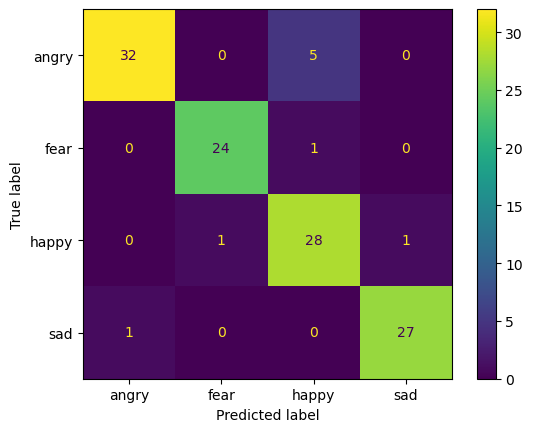

In [157]:
#cm = confusion_matrix(y_testCHROMA, y_pred, labels= TESS_df.labels)
ConfusionMatrixDisplay.from_predictions(y_testCHROMA, rf_predCHROMA)

plt.show()

In [154]:
from sklearn.naive_bayes import GaussianNB

GNB_MFCC = GaussianNB()
GNB_MFCC.fit(X_trainMFCC, y_trainMFCC)

GNB_ZCR = GaussianNB()
GNB_ZCR.fit(X_trainZCR, y_trainZCR)

GNB_CHROMA = GaussianNB()
GNB_CHROMA.fit(X_trainCHROMA, y_trainCHROMA)

GaussianNB()

In [155]:
print("MFCC accuracy: ")
print(GNB_MFCC.score(X_testMFCC, y_testMFCC))
GNB_predMCFF = GNB_MFCC.predict(X_testMFCC)

print("\nZCR accuracy: ")
print(GNB_ZCR.score(X_testZCR, y_testZCR))
GNB_predZCR = GNB_ZCR.predict(X_testZCR)

print("\nCHROMA accuracy:")
print(GNB_CHROMA.score(X_testCHROMA, y_testCHROMA))
GNB_predCHROMA = GNB_CHROMA.predict(X_testCHROMA)

MFCC accuracy: 
0.6666666666666666

ZCR accuracy: 
0.725

CHROMA accuracy:
0.5166666666666667


In [156]:
print(classification_report(y_testCHROMA, GNB_predCHROMA))

              precision    recall  f1-score   support

       angry       0.43      0.41      0.42        37
        fear       0.53      1.00      0.69        25
       happy       0.45      0.43      0.44        30
         sad       1.00      0.32      0.49        28

    accuracy                           0.52       120
   macro avg       0.60      0.54      0.51       120
weighted avg       0.59      0.52      0.50       120



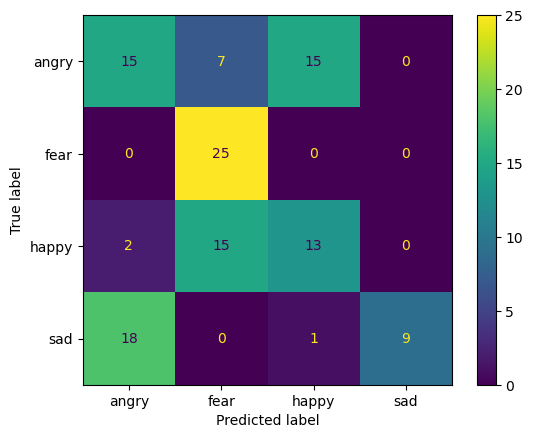

In [158]:
ConfusionMatrixDisplay.from_predictions(y_testCHROMA, GNB_predCHROMA)

plt.show()

In [163]:
from sklearn.ensemble import AdaBoostClassifier

ABC_MFCC = AdaBoostClassifier(n_estimators = 150, random_state = 68)
ABC_MFCC.fit(X_trainMFCC, y_trainMFCC)

ABC_ZCR = AdaBoostClassifier(n_estimators = 150, random_state = 68)
ABC_ZCR.fit(X_trainZCR, y_trainZCR)

ABC_CHROMA = AdaBoostClassifier(n_estimators = 150, random_state = 68)
ABC_CHROMA.fit(X_trainCHROMA, y_trainCHROMA)

AdaBoostClassifier(n_estimators=150, random_state=68)

In [164]:
print("MFCC accuracy: ")
print(ABC_MFCC.score(X_testMFCC, y_testMFCC))
ABC_predMCFF = ABC_MFCC.predict(X_testMFCC)

print("\nZCR accuracy: ")
print(ABC_ZCR.score(X_testZCR, y_testZCR))
ABC_predZCR = ABC_ZCR.predict(X_testZCR)

print("\nCHROMA accuracy:")
print(ABC_CHROMA.score(X_testCHROMA, y_testCHROMA))
ABC_predCHROMA = ABC_CHROMA.predict(X_testCHROMA)

MFCC accuracy: 
0.38333333333333336

ZCR accuracy: 
0.39166666666666666

CHROMA accuracy:
0.475


In [166]:
print(classification_report(y_testCHROMA, ABC_predCHROMA))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        37
        fear       0.80      0.48      0.60        25
       happy       0.41      0.57      0.48        30
         sad       0.44      1.00      0.61        28

    accuracy                           0.48       120
   macro avg       0.41      0.51      0.42       120
weighted avg       0.37      0.47      0.39       120



C:\Users\Gabriel\anaconda3\envs\MM\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\anaconda3\envs\MM\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\anaconda3\envs\MM\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


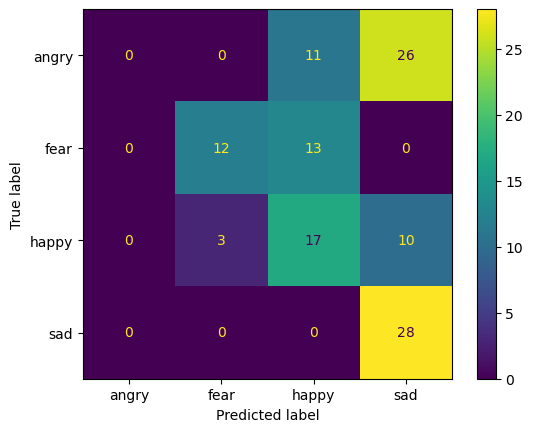

In [165]:
ConfusionMatrixDisplay.from_predictions(y_testCHROMA, ABC_predCHROMA)

plt.show()